In [1]:
## Importing Libraries
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from glob import glob
import math
import random

# 1. Direct Linear Transform

### Selecting image points

In [2]:
#image_points = []
#fig = plt.figure(figsize=(20,30))

#img=mpimg.imread('../calibration-data/calib-object.jpg')

#def onclick(event):
#    ix, iy = event.xdata, event.ydata
#    # print(ix, iy)
#    image_points.append([ix, iy])

#cid = fig.canvas.mpl_connect('button_press_event', onclick)

#imgplot = plt.imshow(img)
#plt.show()

In [3]:
#We'll rename image_points to x to match textbook convention
image_points = []
image_points.append([1550.4366113200617,1591.821543239807])
image_points.append([1664.921520961379,1613.628192695296])
image_points.append([1806.6647424220569,1629.9831797869128])
image_points.append([1937.5046391549909,1651.789829242402])
image_points.append([2090.1511853434145,1668.1448163340187])
image_points.append([2248.249393895709,1684.4998034256355])
image_points.append([2422.7025895396214,1700.8547905172522])
image_points.append([2618.9624346390224,1733.5647647004857])
image_points.append([1555.8882736839337,1760.8230765198468])
image_points.append([1550.4366113200617,1924.3729474360143])
image_points.append([1550.4366113200617,2077.0194936244375])
image_points.append([1544.9849489561889,2240.569364540605])
image_points.append([1550.4366113200617,2398.6675730929005])
image_points.append([1544.9849489561889,2556.7657816451956])
image_points.append([1555.8882736839337,2698.5090031058744])
image_points.append([1544.9849489561889,2851.1555492942975])
image_points.append([1550.4366113200617,2987.447108391104])
image_points.append([1425.0483769509997,1608.1765303314237])
image_points.append([1288.7568178541928,1629.9831797869128])
image_points.append([1136.1102716657701,1646.3381668785296])
image_points.append([983.4637254773475,1668.1448163340187])
image_points.append([809.0105298334352,1679.048141061763])
image_points.append([623.654009461779,1706.3064528811242])
image_points.append([432.8458267262499,1722.661439972741])
x = np.asarray(image_points)
# X represents the 3D world points
X = []
#Add your points here
X.append([0,0,0])
X.append([2.8,0,0])
X.append([5.6,0,0])
X.append([8.4,0,0])
X.append([11.2,0,0])
X.append([14.0,0,0])
X.append([16.8,0,0])
X.append([19.6,0,0])
X.append([0,2.8,0])
X.append([0,5.6,0])
X.append([0,8.4,0])
X.append([0,11.2,0])
X.append([0,14.0,0])
X.append([0,16.8,0])
X.append([0,19.6,0])
X.append([0,22.4,0])
X.append([0,25.2,0])
X.append([0,0,2.8])
X.append([0,0,5.6])
X.append([0,0,8.4])
X.append([0,0,11.2])
X.append([0,0,14.0])
X.append([0,0,16.8])
X.append([0,0,19.6])

#Add them as 3D points only
# X.append([1,0,0])

X = np.array(X)

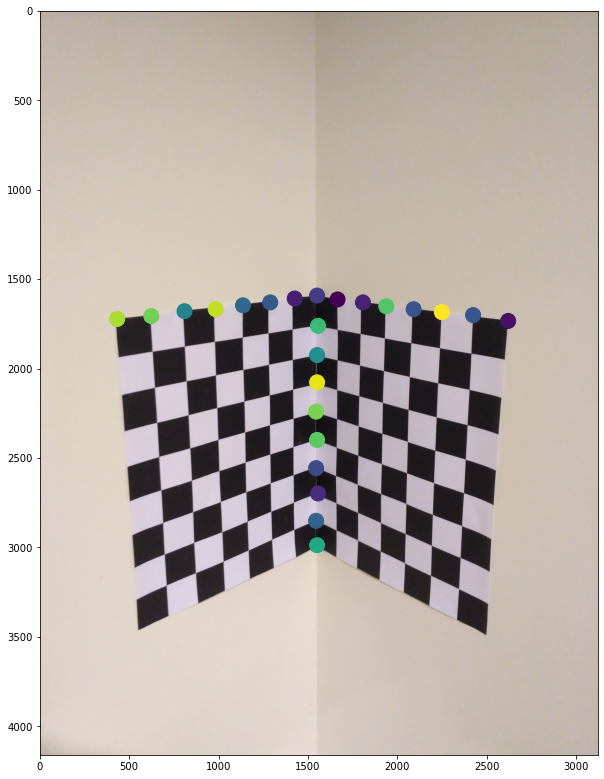

In [4]:

%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('../calibration-data/calib-object.jpg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

### Adding world points

### Helper functions

In [5]:
#Helper functions
#appends a ones column to input
def hom_coords(x,X):
#     print(x,X)
#     print(x.shape,X.shape)
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate(
        (x,ones),
        axis = 1)
    X = np.concatenate(
        (X,ones),
        axis = 1)
    return x, X

x,X = hom_coords(x,X)


#DLT function takes as input 
#the image points and world points
#return a 3x4 matrix
def DLT(x,X):
    """
    your code here
    """
    P = np.random.randn(3,4)
    A = []
    for i in range(x.shape[0]):
        A.append([X[i,0],X[i,1],X[i,2],1,0,0,0,0,-X[i,0]*x[i,0],-X[i,1]*x[i,0],-X[i,2]*x[i,0],-x[i,0]])
        A.append([0,0,0,0,X[i,0],X[i,1],X[i,2],1,-X[i,0]*x[i,1],-X[i,1]*x[i,1],-X[i,2]*x[i,1],-x[i,1]])
#         print(A)
    A = np.asarray(A,dtype=np.float64)
#     print(A.shape)
    U,D,VT= np.linalg.svd(A)
#     print(VT.shape)
    P = np.array(VT[-1,:]).reshape(3,4)
    P_norm = P/P[2,3]
    return P_norm

#Get reprojected points
def get_points(P,X):
    points = P@X.T
    points = points / points[2]
    points = points.T[:,0:2]
    return points

#Get reprojection error
def get_err(x, X, P):
    points = get_points(P, X)
    """
    find the MSE between reprojected points
    and x
    """
    x_temp = x[:,0:2]
    err = np.sum((x_temp-points)**2)/2/len(x_temp)
    #to err is to human
    return err
## finding normalised co-ordinates
def get_UT(x,X):
    ## normalising x points
    x_mean = np.mean(x, axis=0)
    #print(x_mean)
    x_sub = x - x_mean
    d_mean = np.sqrt(np.sum((x_sub)**2))/len(x)

    ## normalising X points
    X_mean = np.mean(X, axis=0)
    X_sub = X - X_mean
    D_mean = np.sqrt(np.sum((X_sub)**2))/len(X)

    T = [[np.sqrt(2)/d_mean, 0, -(np.sqrt(2)*x_mean[0])/d_mean], [ 0, np.sqrt(2)/d_mean, -(np.sqrt(2)*x_mean[1])/d_mean], [ 0, 0, 1] ]
    U = [[np.sqrt(3)/D_mean, 0,0, -(np.sqrt(3)*X_mean[0])/D_mean], [ 0, np.sqrt(3)/D_mean,0, -(np.sqrt(3)*X_mean[1])/D_mean],  [ 0,0, np.sqrt(3)/D_mean, -(np.sqrt(3)*X_mean[2])/D_mean], [ 0, 0, 0, 1] ]

    T = np.asarray(T)
    U = np.asarray(U)
    return U,T

### DLT For scale 2800 mm

#### Use original data points as input

In [6]:
U,T = get_UT(x,X)
P_final = DLT(x,X)
print("The final p matrix is")
print(P_final)
error = get_err(x, X, P_final)
print("The MSE between calculated and actual image points is",error)

The final p matrix is
[[ 2.25245371e+01  4.47254137e+00 -6.21231507e+01  1.55175202e+03]
 [-1.41146534e+01  6.43259071e+01 -1.29428330e+01  1.59635254e+03]
 [-1.21547840e-02  2.97902915e-03 -1.13515525e-02  1.00000000e+00]]
The MSE between calculated and actual image points is 13.983287787471049


#### Use normalized data points as input

In [7]:
## results
P_final_nor = DLT((T@x.T).T,(U@X.T).T)
print(P_final_nor)
error2 = get_err((T@x.T).T,(U@X.T).T, P_final_nor)
print("The MSE between calculated and actual image points is",error2)


[[ 0.63020473 -0.00176853 -0.68152766 -0.01115792]
 [ 0.14362089  0.89478372  0.13780975  0.32865538]
 [-0.01771235  0.00443941 -0.01654795  1.        ]]
The MSE between calculated and actual image points is 0.0015287591439034677


#### Use normalized data points as input  (with the denormalized projection matrix).

In [8]:
P_final_denor = np.linalg.inv(T)@(P_final_nor@U)
P_final_denor = P_final_denor/P_final_denor[-1,-1]
print(P_final_denor)
error3 = get_err(x,X, P_final_denor )
print("The MSE between calculated and actual image points is",error3)

[[ 2.26087240e+01  4.56613933e+00 -6.21037517e+01  1.55171242e+03]
 [-1.40400389e+01  6.45007564e+01 -1.28792038e+01  1.59614666e+03]
 [-1.21212045e-02  3.03804887e-03 -1.13243645e-02  1.00000000e+00]]
The MSE between calculated and actual image points is 14.012155944510127


### DLT For scale 28 mm

#### Use original data points as input

In [9]:
## results
X_L = X
X_L[:,0:3] = X[:,0:3]/100
X_L[:,3] = X[:,3]
U,T = get_UT(x,X_L) 
P_final_L = DLT(x,X_L)
print("The final p matrix is")
print(P_final_L)
error = get_err(x, X_L, P_final_L)
print("The MSE between calculated and actual image points is",error)



The final p matrix is
[[ 2.26730632e+03  4.63592380e+02 -6.21670121e+03  1.55156316e+03]
 [-1.39977061e+03  6.46120828e+03 -1.30538981e+03  1.59604709e+03]
 [-1.20983298e+00  3.07753121e-01 -1.14294417e+00  1.00000000e+00]]
The MSE between calculated and actual image points is 14.074824852403383


#### Use normalized data points as input

In [10]:
P_final_nor_L = DLT((T@x.T).T,(U@X_L.T).T)
print(P_final_nor_L)
error2 = get_err((T@x.T).T,(U@X_L.T).T, P_final_nor_L)
print("The MSE between calculated and actual image points is",error2)

[[ 0.63020473 -0.00176853 -0.68152766 -0.01115792]
 [ 0.14362089  0.89478372  0.13780975  0.32865538]
 [-0.01771235  0.00443941 -0.01654795  1.        ]]
The MSE between calculated and actual image points is 0.0015287591439034623


#### Use normalized data points as input  (with the denormalized projection matrix).

In [11]:
P_final_denor_L = np.linalg.inv(T)@(P_final_nor_L@U)
P_final_denor_L = P_final_denor_L/P_final_denor_L[-1,-1]
print(P_final_denor_L)
error3 = get_err(x,X_L, P_final_denor_L)
print("The MSE between calculated and actual image points is",error3)

[[ 2.26087240e+03  4.56613933e+02 -6.21037517e+03  1.55171242e+03]
 [-1.40400389e+03  6.45007564e+03 -1.28792038e+03  1.59614666e+03]
 [-1.21212045e+00  3.03804887e-01 -1.13243645e+00  1.00000000e+00]]
The MSE between calculated and actual image points is 14.012155944510075


### Theory 1.1

* In case(a) and case(c), there is a difference of 100 between the projection matrices for both the scales in first 2 columns. 
> <u>Reason</u> : This is because of the scale difference in world points. The 3D – x,y,z coordinates are scaled by a factor of 100 , so the first 3 columns of the projection matrix will be scaled down by a factor of 100 in order to get the same equation and same 2D correspondences in the image plane
* In case(a) and case(c), there is no much difference in last columns of projection matrices for both the scales. 
> <u>Reason</u> : When normalisation is not done, the homogenisation co-ordinate has very less effect on the projection matrix. Hence, the last columns are almost the same for both the scales. This results in the difference in reconstruction error.
* In case(b), I got same projection matrices for both the scales.
> <u>Reason</u> : Normalisation removes the effect that scaling has on the projection matrix.
* Reconstructed projection matrix using denormalised projection matrix and original data points is same as the original projection matrix.
> <u>Reason</u> : It is trivial that case(a) and case(c) give same projection matrices. This is because all the matrix operations that are done to normalise are reversed in denormalisation. And hence, we get back to the origi
* Normalised Projection matrix is different from above both and gave better results, i.e the error is less.
> <u>Reason</u> : Units are different for image and model. Hence, for the results to be better, normalisation has to be done. And normalisation also makes sure that the homogenous co-ordinate have some effect and removes the noise on the projection matrix. This results to the decrease in error.

## Q1 P2:  Decomposition of projection matrix 

In [12]:
## helper functions

def ret_RKT(P):
    """
    """
    H = np.array(P[:,0:3]).reshape(3,3)
    h = np.array(P[:,3]).reshape(3,1)
    H1 = np.linalg.inv(H)
    X0 = -np.dot(H1,h)
    
    #print(H1,h)
    R1, K1 = np.linalg.qr(H1)
    R = R1.T
    T = np.dot(R,-X0)
    K = np.linalg.inv(K1)
    K = K/K[-1,-1]
    return R, K , T 
def get_RK(R,K,T):
    Rz = np.array([[-1,0,0],[0,-1,0],[0,0,1]])
    R1 = Rz@R
    T1 = Rz@T
    K1 = K@Rz
    return R1,K1,T1

### Obtaining R,K,T from the P Matrix

In [13]:
R,K,T = ret_RKT(P_final)

print("The rotation matrix (R) is")
print(R)
print("The K matrix is ")
print(K)
print("The translation matrix (C) is")
print(T)


The rotation matrix (R) is
[[-0.68291868 -0.00286924  0.73048877]
 [-0.12686972 -0.98432929 -0.12247414]
 [ 0.7193929  -0.17631678  0.67185285]]
The K matrix is 
[[ 3.59705941e+03 -2.06170765e+01  1.55790586e+03]
 [ 0.00000000e+00  3.54772591e+03  1.78690769e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
The translation matrix (C) is
[[  0.11947613]
 [  3.17899279]
 [-59.18598787]]


### Fixing Intrinsic Matrix

In [14]:
R1, K1, T1 = get_RK(R,K,T)
print("The rotation matrix (R) is")
print(R1)
print("The K matrix is ")
print(K1)
print("The translation matrix (C) is")
print(T1)

The rotation matrix (R) is
[[ 0.68291868  0.00286924 -0.73048877]
 [ 0.12686972  0.98432929  0.12247414]
 [ 0.7193929  -0.17631678  0.67185285]]
The K matrix is 
[[-3.59705941e+03  2.06170765e+01  1.55790586e+03]
 [ 0.00000000e+00 -3.54772591e+03  1.78690769e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
The translation matrix (C) is
[[ -0.11947613]
 [ -3.17899279]
 [-59.18598787]]


### Proving the above transformation doesn't effect output

In [15]:
T1= T1.reshape((3))

P_recovered = np.empty((3,4))
P_recovered[:3,:3] = K1@R1
P_recovered[:,3] = K1@T1
P_recovered /= P_recovered[-1,-1]
print("The recovered P matrix is")
print(P_recovered)
print("The original P matrix is")
print(P_final)
print("As we can see, they are the same")

The recovered P matrix is
[[ 2.25245371e+01  4.47254137e+00 -6.21231507e+01  1.55175202e+03]
 [-1.41146534e+01  6.43259071e+01 -1.29428330e+01  1.59635254e+03]
 [-1.21547840e-02  2.97902915e-03 -1.13515525e-02  1.00000000e+00]]
The original P matrix is
[[ 2.25245371e+01  4.47254137e+00 -6.21231507e+01  1.55175202e+03]
 [-1.41146534e+01  6.43259071e+01 -1.29428330e+01  1.59635254e+03]
 [-1.21547840e-02  2.97902915e-03 -1.13515525e-02  1.00000000e+00]]
As we can see, they are the same


### Theory 1.2

The intrinsic Matrix K :
K = $\begin{bmatrix}c & cs & x_{H}\\0 & c(1+m) & y_{H} \\0 & 0 & 1 \end{bmatrix}$

To get the focal length values negetive we shall post multiply the K with $R_{(z,{pi})}$ 

K$R_{(z,{pi})}$  =  $\begin{bmatrix}-c & cs & x_{H}\\0 & -c(1+m) & y_{H} \\0 & 0 & 1 \end{bmatrix}$


$R_{(z,{pi})}$ =  $\begin{bmatrix}-1 & 0 & 0\\ 0 & -1 & 0 \\0 & 0 & 1 \end{bmatrix}$ 

To compensate this we have to pre-multiply transpose of $R_{(z,{pi})}$ with rest. 

Because ${RR^T}$ = $I$ . But we know ($R_{(z,{pi})}^T$) = $R_{(z,{pi})}$ 

So $K^{'}R^{'}$  = $KR_zR_ZR$ = $KIR$ = $KR$ 

## Q1 P3 :   Implementing RANSAC

In [16]:
def get_ransac(x_t,X_t, ite, samp_size, ther):
    P_best = np.zeros((3,4))
    ini = 0
    now = 0
    best_err = np.inf
    total_size = len(x_t)
    for i in range(ite):
        ini = 0
        rand_x = random.sample(range(0,8),int(samp_size/3))
        rand_y = random.sample(range(8,17),int(samp_size/3))
        rand_z = random.sample(range(17,24),int(samp_size/3))
        samp = np.hstack((rand_x,np.hstack((rand_y,rand_z))))
        x_samp = x_t[samp]
        X_samp = X_t[samp]
        P_est = DLT(x_samp,X_samp)
        for j in range(len(x_t)):
            if j not in set(samp):
                x_reco = (P_est@(X_t[j].T))
                x_reco = (x_reco/x_reco[2]).T
                err = ((x_reco[0]-x_t[j,0])**2 + (x_reco[1]-x_t[j,1])**2)
                err = np.sqrt(err)
                if (err<ther):
                    x_samp = np.vstack((x_samp,x_reco))
                    X_samp = np.vstack((X_samp,X_t[j]))
                    ini = ini + 1 
        P_est = DLT(x_samp,X_samp)
        err = get_err(x_t,X_t,P_est) 
        if((now<=ini) & (err<best_err)):
            P_best = P_est
            now = ini
            best_err = err
    print("no of inliners are: ")
    print(now)
    print("final re-projection error is: ")
    print(best_err)
    return P_best
    

### For 28 mm 

In [17]:
print(get_ransac(x,X, ite=1000, samp_size=9, ther=10))

no of inliners are: 
15
final re-projection error is: 
15.98671288327145
[[ 2.30213385e+03  4.81023012e+02 -6.18372415e+03  1.54860380e+03]
 [-1.39586185e+03  6.45455649e+03 -1.30722014e+03  1.59745124e+03]
 [-1.20519201e+00  3.10503320e-01 -1.13859940e+00  1.00000000e+00]]


### For 2800 mm

In [18]:
X_L = X
X_L[:,0:3] = X[:,0:3]*100
X_L[:,3] = X[:,3]
print(get_ransac(x,X_L, ite=1000, samp_size=9, ther=10))

no of inliners are: 
15
final re-projection error is: 
16.411479626577247
[[ 2.13090320e+01  5.41396192e+00 -6.19108576e+01  1.55116479e+03]
 [-1.49204203e+01  6.57602153e+01 -1.27150030e+01  1.59522703e+03]
 [-1.26665115e-02  3.51629303e-03 -1.12201729e-02  1.00000000e+00]]


### Q 1.3.b

$\textbf{Answer :}$

Let us say we run RANSAC for 'N' iterations

Let probability of selecting an outlier be e
$$e = \frac{No. of Inliers}{Total No. of Points}$$
 
Let the number of points needed for estimating a model be s

$\therefore$ Probability of selecting all 's' points as inliers -  $(1-e)^s$ 

$\implies$ Probability that RANSAC never selects all n points as inliers in any of the N iterations is - $(1-(1-e)^s)^N$ 

Let p be the probability that RANSAC successfully selects all inliers in one of the N iterations

$$\therefore p = 1 - (1-(1-e)^s)^N \rightarrow (1)$$
 
 
Given the values,

$$p = 0.95$$

$$e = (1 - 0.8) = 0.2$$

$$s = 6$$

To find value of N, using (1) we get

$$N = \frac{log(1-p)}{log(1-(1-e)^s)} \rightarrow (2)$$
 
Substituting given values in (2) we get,

$$N = \frac{log(0.05)}{log(1-(0.8)^6)}$$

$$N = 9.854168689635502 \implies N = 10$$ 
 
So to get an accuracy of more than 95% we have to make atleast 10 iterations

In [19]:
s = 6
e = 0.2
ite = 0
p = 0
while (p<0.95):
    ite+=1
    p = 1 - (1-(1-e)**s)**ite
    print ("probability for ",ite," iterations is: ",p)
print ("Min iterations:",ite)

probability for  1  iterations is:  0.26214400000000015
probability for  2  iterations is:  0.4555685232640002
probability for  3  iterations is:  0.5982879683014822
probability for  4  iterations is:  0.7035943671390585
probability for  5  iterations is:  0.7812953253597572
probability for  6  iterations is:  0.838627443588649
probability for  7  iterations is:  0.8809302910165463
probability for  8  iterations is:  0.9121437008083048
probability for  9  iterations is:  0.9351747025036126
probability for  10  iterations is:  0.9521682652905056
Min iterations: 10


The reconstruction error is slightly more in case of RANSAC compared to DLT on all the points. This is expected as the error in the case when we consider only a few points is comparitively high and there is a probability that the points selected randomly by RANSAC might not be all inliers. Also another plausible explaination for the outcome is that all of the samples might have slight deviation from the ideal case so these are magnified when we pick only a few points for RANSAC method for finding the Projection matrix.

Also the projection matrix and reprojection error might not be the same if we run the RANSAC algorithm multiple times because each times the model used is selected randomnly.

### Q 1.3.c -- Plotting Probability vs iterations for RANSAC

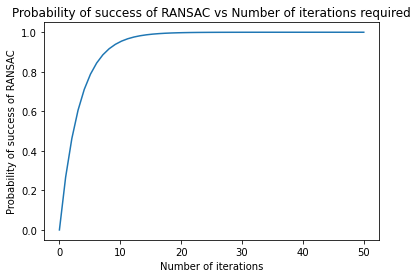

In [20]:
ite = np.linspace(0,50,50)
p = 1 - (1-(1-e)**s)**ite
plt.plot(ite,p)
plt.title("Probability of success of RANSAC vs Number of iterations required")
plt.xlabel("Number of iterations")
plt.ylabel("Probability of success of RANSAC")
plt.show()

# 2. Zhang's Method

Perform camera calibration using Zhang’s Method

In [21]:
#Code for zhangs here
# print("sdkifho;aisw")
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# print("chekcoooooo")
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images=[]
for i in range(56,71):
#     print("check")
    img =cv2.imread("../calibration-data/IMG_54"+str(i)+".JPG")
    images.append(img)

# print("checkie")
for img in images:
#     print("enter")
#     plt.imshow(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)
#     print("after")
    # If found, add object points, image points (after refining them)
    if ret == True:
#         print("true")
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        #print("The corners in the image are")
        #print(corners)
        img = cv2.drawChessboardCorners(img, (8,6), corners2,ret)
        #plt.imshow(img)
        #plt.show()

cv2.destroyAllWindows()

### Finding Intrinsic Matrix

In [22]:
#TCamera matrix
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
#ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img.shape[1],img.shape[0]), None, None)
print("The camera matrix 'K' obtained using Zhang's Method is")
print(K)
print("The error in this process is ")
print(ret)

The camera matrix 'K' obtained using Zhang's Method is
[[1.36415095e+04 0.00000000e+00 3.31635924e+03]
 [0.00000000e+00 1.36632518e+04 1.50037425e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
The error in this process is 
2.288415145543703


### Plotting Wire frame

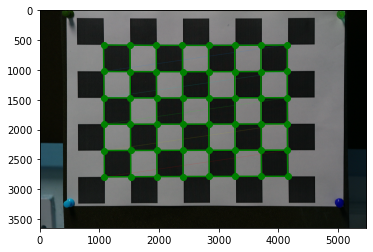

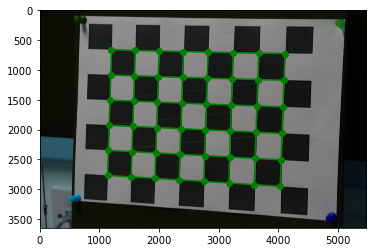

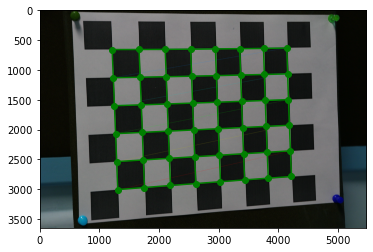

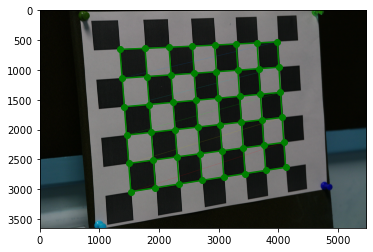

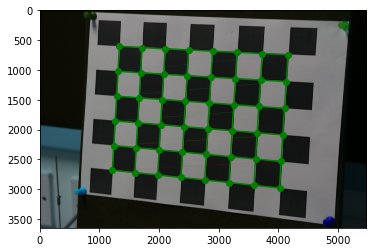

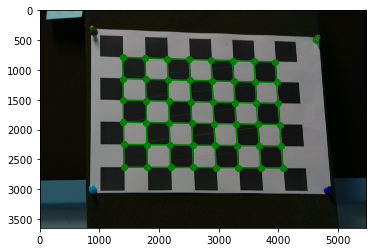

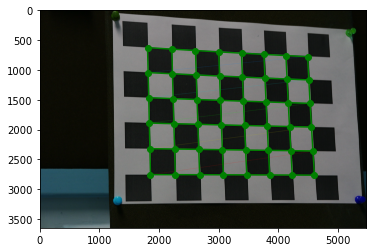

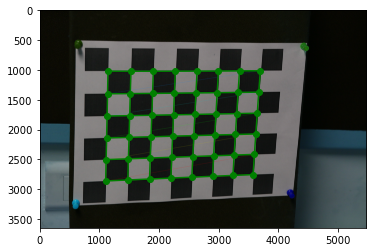

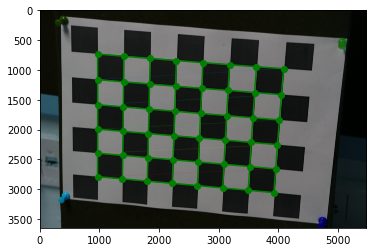

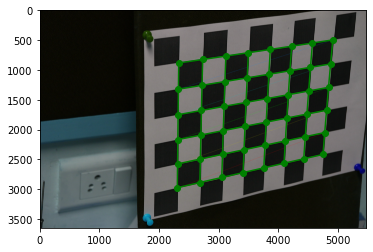

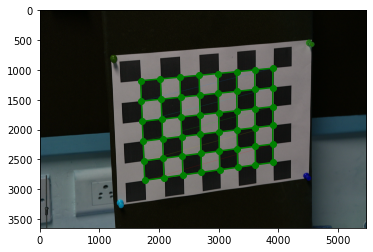

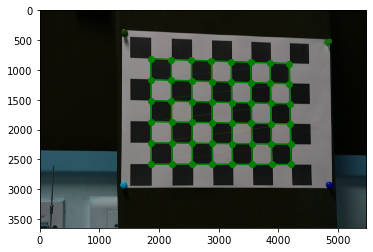

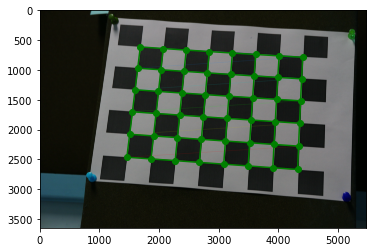

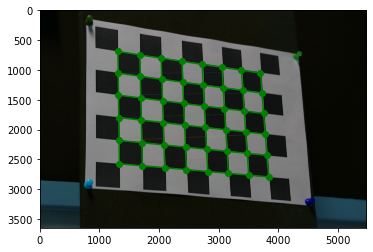

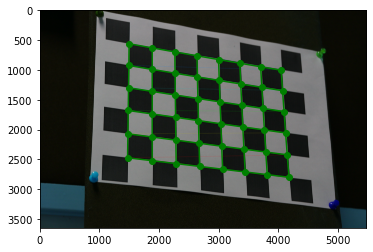

In [23]:
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
    plt.imshow(images[i])

    for i in range(6):
        plt.plot(imgpoints2[i*8:i*8+8,0,0],imgpoints2[i*8:i*8+8,0,1],'g')
    for i in range(8):
        plt.plot(imgpoints2[i::8,0,0],imgpoints2[i::8,0,1],'g')

    plt.scatter(imgpoints2[:,0,0],imgpoints2[:,0,1],c='g')
        
    plt.show()

### What do you observe about the overlay?

#### Answer

When the image is taken from a larger angle the wireframe doesn't fit properly. This could be arising from improper calculation of rotation and translation vectors. For more or less perpendicular images the wireframe fits exactly.

# Q3 DIY

## Selecting img points 

In [24]:
#image_points = []
#fig = plt.figure(figsize=(20,30))

#img=mpimg.imread('../images/DIY.jpeg')

#def onclick(event):
#    ix, iy = event.xdata, event.ydata
#    # print(ix, iy)
#    image_points.append([ix, iy])

#cid = fig.canvas.mpl_connect('button_press_event', onclick)

#imgplot = plt.imshow(img)
#plt.show()

In [25]:
x = [[ 603.5242926,   479.85947283],
 [ 390.62695566,  397.06606402],
 [ 205.32742165,  312.30138357],
 [  73.25222188,  241.33560459],
 [ 818.39290118,  369.46826109],
 [1011.57752174,  272.87595081],
 [1155.48035134,  201.91017183],
 [ 617.32319407,  745.98114401],
 [ 629.1508239,   986.47628389],
 [ 627.17955226, 1169.80454626]]
x = np.asarray(x)

X = []
#Add your points here
X.append([0,0,0])
X.append([1.8,0,0])
X.append([3.6,0,0])
X.append([5.4,0,0])
X.append([0,1.8,0])
X.append([0,3.6,0])
X.append([0,5.4,0])
X.append([0,0,1.8])
X.append([0,0,3.6])
X.append([0,0,5.4])
X = np.asarray(X)
print(x)
print(X)

[[ 603.5242926   479.85947283]
 [ 390.62695566  397.06606402]
 [ 205.32742165  312.30138357]
 [  73.25222188  241.33560459]
 [ 818.39290118  369.46826109]
 [1011.57752174  272.87595081]
 [1155.48035134  201.91017183]
 [ 617.32319407  745.98114401]
 [ 629.1508239   986.47628389]
 [ 627.17955226 1169.80454626]]
[[0.  0.  0. ]
 [1.8 0.  0. ]
 [3.6 0.  0. ]
 [5.4 0.  0. ]
 [0.  1.8 0. ]
 [0.  3.6 0. ]
 [0.  5.4 0. ]
 [0.  0.  1.8]
 [0.  0.  3.6]
 [0.  0.  5.4]]


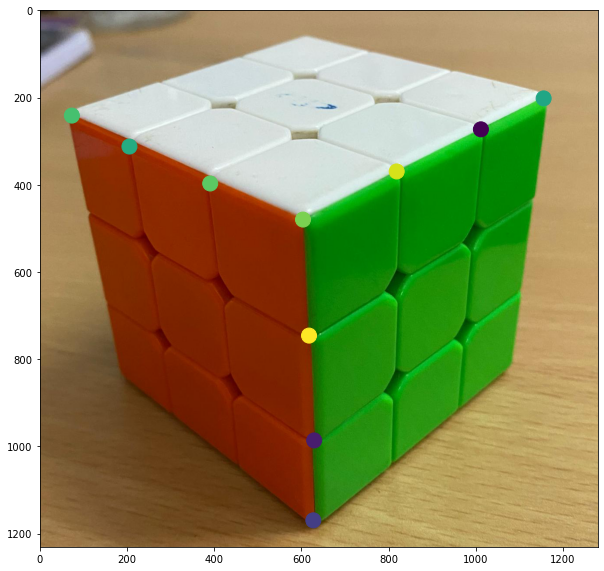

In [26]:

%matplotlib inline
image_points = x
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('../images/DIY.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

In [27]:
#print(image_points)


## Selecting World points

### Homogenous co- ordinates

In [28]:
x,X = hom_coords(x,X)
print(x)
print(X)

[[6.03524293e+02 4.79859473e+02 1.00000000e+00]
 [3.90626956e+02 3.97066064e+02 1.00000000e+00]
 [2.05327422e+02 3.12301384e+02 1.00000000e+00]
 [7.32522219e+01 2.41335605e+02 1.00000000e+00]
 [8.18392901e+02 3.69468261e+02 1.00000000e+00]
 [1.01157752e+03 2.72875951e+02 1.00000000e+00]
 [1.15548035e+03 2.01910172e+02 1.00000000e+00]
 [6.17323194e+02 7.45981144e+02 1.00000000e+00]
 [6.29150824e+02 9.86476284e+02 1.00000000e+00]
 [6.27179552e+02 1.16980455e+03 1.00000000e+00]]
[[0.  0.  0.  1. ]
 [1.8 0.  0.  1. ]
 [3.6 0.  0.  1. ]
 [5.4 0.  0.  1. ]
 [0.  1.8 0.  1. ]
 [0.  3.6 0.  1. ]
 [0.  5.4 0.  1. ]
 [0.  0.  1.8 1. ]
 [0.  0.  3.6 1. ]
 [0.  0.  5.4 1. ]]


### Use original data points as input.

In [29]:
## results
U,T = get_UT(x,X)
P_final = DLT(x,X)
print("The final p matrix is")
print(P_final)
error = get_err(x, X, P_final)
print("The MSE between calculated and actual image points is",error)

The final p matrix is
[[-9.46498357e+01  1.75451553e+02  3.83749370e+01  6.03420202e+02]
 [-2.85874482e+01 -4.00866494e+01  1.89074949e+02  4.83912243e+02]
 [ 6.36424400e-02  6.31046312e-02  5.25514428e-02  1.00000000e+00]]
The MSE between calculated and actual image points is 23.924865661172113


### Use normalized data points as input

In [30]:
P_final_nor = DLT((T@x.T).T,(U@X.T).T)
print(P_final_nor)
error2 = get_err((T@x.T).T,(U@X.T).T, P_final_nor)
print("The MSE between calculated and actual image points is",error2)

[[-0.6481307   0.66350657  0.03006752  0.00113198]
 [-0.29840785 -0.35277113  0.78442618 -0.03501715]
 [ 0.03144135  0.03116042  0.02589859  1.        ]]
The MSE between calculated and actual image points is 0.0023884256845872536


### Use normalized data points as input (denormalised Projection Matrix)

In [31]:
P_final_denor = np.linalg.inv(T)@(P_final_nor@U)
P_final_denor = P_final_denor/P_final_denor[-1,-1]
print(P_final_denor)
error3 = get_err(x,X, P_final_denor )
print("The MSE between calculated and actual image points is",error3)

[[-9.44421626e+01  1.76789005e+02  3.89758435e+01  6.03157356e+02]
 [-2.82195667e+01 -3.97759080e+01  1.90073306e+02  4.83701785e+02]
 [ 6.48405960e-02  6.42612558e-02  5.34099307e-02  1.00000000e+00]]
The MSE between calculated and actual image points is 24.077342656341767


### Performing Decomposition of P matrix

In [32]:
R,K,T = ret_RKT(P_final)

print("The rotation matrix (R) is")
print(R)
print("The K matrix is ")
print(K)
print("The translation matrix (C) is")
print(T)


The rotation matrix (R) is
[[-0.7193485   0.69359332  0.03828902]
 [-0.32757164 -0.38730966  0.8617935 ]
 [ 0.61256392  0.60738747  0.50581213]]
The K matrix is 
[[ 1.84077430e+03 -3.73280884e+01  6.54491448e+02]
 [ 0.00000000e+00  1.80791778e+03  5.17604697e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
The translation matrix (C) is
[[-0.27068   ]
 [-0.17937361]
 [ 9.62508543]]


### RANSAC

In [33]:
def get_ransac_2(x_t,X_t, ite, samp_size, ther):
    #print("ff") 
    #samp_size = 6
    P_best = np.zeros((3,4))
    ini = 0
    now = 0
    best_err = np.inf
    total_size = len(x_t)
    for i in range(ite):
        ini = 0
        rand_x = random.sample(range(0,4),int(samp_size/3))
        rand_y = random.sample(range(4,7),int(samp_size/3))
        rand_z = random.sample(range(7,10),int(samp_size/3))
        samp = np.hstack((rand_x,np.hstack((rand_y,rand_z))))
        x_samp = x_t[samp]
        X_samp = X_t[samp]
        P_est = DLT(x_samp,X_samp)
        for j in range(len(x_t)):
            if j not in set(samp):
                x_reco = (P_est@(X_t[j].T))
                x_reco = (x_reco/x_reco[2]).T
                err = ((x_reco[0]-x_t[j,0])**2 + (x_reco[1]-x_t[j,1])**2)
                err = np.sqrt(err)
                if (err<ther):
                    x_samp = np.vstack((x_samp,x_reco))
                    X_samp = np.vstack((X_samp,X_t[j]))
                    ini = ini + 1
        P_est = DLT(x_samp,X_samp)
        err = get_err(x_t,X_t,P_est) 
        if((now<=ini) & (err<best_err)):
            P_best = P_est
            now = ini
            best_err = err
    print(now)
    print(best_err)
    return P_best
    

In [34]:
print(get_ransac_2(x,X, ite=100, samp_size=9, ther=10))

1
27.221911611811255
[[-9.43320318e+01  1.77863496e+02  3.57891155e+01  6.03283125e+02]
 [-2.93248156e+01 -4.08946169e+01  1.83215887e+02  4.89452160e+02]
 [ 6.57750570e-02  6.52870632e-02  4.83756919e-02  1.00000000e+00]]


| Model                      | Error    |  
|-------------------------------|-----------------|
| DLT       |     23.92486566112353       |
| RANSAC  |    27.221911611862318   |
    